# General information

Links to Raw Acoustic Data for experiment [p4581](https://psu.box.com/s/6c2mkkb8s3qhb74urx18igbk5sg7iius).
<br />Data shared by David Chas Bolton. More information on his personal [site](https://sites.psu.edu/chasbolton/).

<br />The .npz files contain the raw continuous time series data, single channel-33 and time to failure. Acoustic data are recorded continuously at 4 MHz throughout the experiment from a 14-bit data acquisition system.

In [2]:
import numpy as np
import pandas as pd
import feather
import os, os.path

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import os.path as osp

import warnings
warnings.filterwarnings("ignore")

In [3]:
path = '../input/p4581'
n_files = len(os.listdir(path))

# How load?
<br>Access to Acoustic Data: ``numpy.load("earthquake_*.npz")['acoustic_data'] ``
<br>Time between acoustica data by axis = 1: 0.252016890769332e-6
<br>Time between acoustica data by axis = 0 contained here: ``numpy.load("earthquake_*.npz")['ttf'] ``

# Plot std and single event from set

Data have various std by time. Its terms of the experiment.

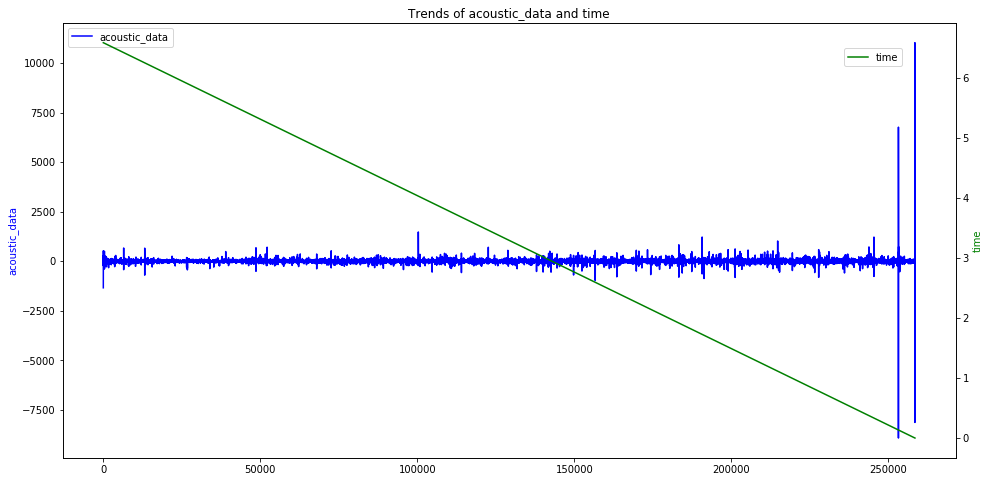

In [9]:
event = 1

acData = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['acoustic_data'] 
acTime = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['ttf'] 

steps = np.arange(4096) * 0.252016890769332e-6
t = acTime[:, np.newaxis] + np.flip(steps)[np.newaxis]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time")
plt.plot(acData.flatten()[::100], color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(t.flatten()[::100], color='g')
ax2.set_ylabel('time', color='g')
plt.legend(['time'], loc=(0.875, 0.9))
plt.grid(False)

In [10]:
train_data_format = 'feather'

In [11]:
def load_train_data(file_format):
    """Load the training dataset."""
    print(f"Loading data from {file_format} file:", end="")
    if file_format.lower() == 'feather':
        train_df = feather.read_dataframe('../input/train.feather')
    else:
        train_df = pd.read_csv('../input/train.csv', dtype={'acoustic_data': np.int16,
                                                            'time_to_failure': np.float32})
        feather.write_dataframe(train_df, '../input/train.feather')
    print("Done")
    return train_df

In [12]:
train = load_train_data(train_data_format)

Loading data from feather file:Done


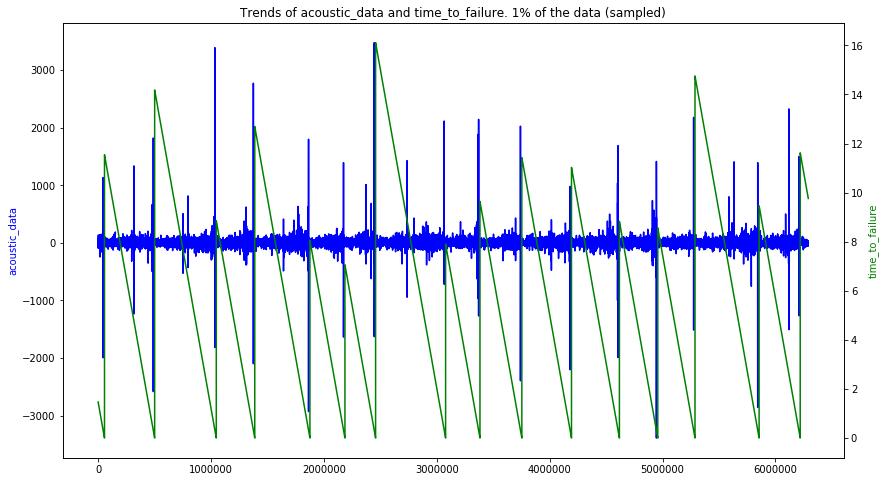

In [13]:
train_acoustic_data_small = train['acoustic_data'].values[::100]
train_time_to_failure_small = train['time_to_failure'].values[::100]

fig, ax1 = plt.subplots(figsize=(14, 8))
plt.title('Trends of acoustic_data and time_to_failure. 1% of the data (sampled)')
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')

del train_acoustic_data_small
del train_time_to_failure_small

In [ ]:
ttf = np.empty((0,))

for event in tqdm_notebook(range(n_files)):
    acTime = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['ttf'] 
    steps = np.arange(4096) * 0.252016890769332e-6
    t = acTime[:, np.newaxis] + np.flip(steps)[np.newaxis]
    ttf = np.hstack([ttf, t.flatten()])

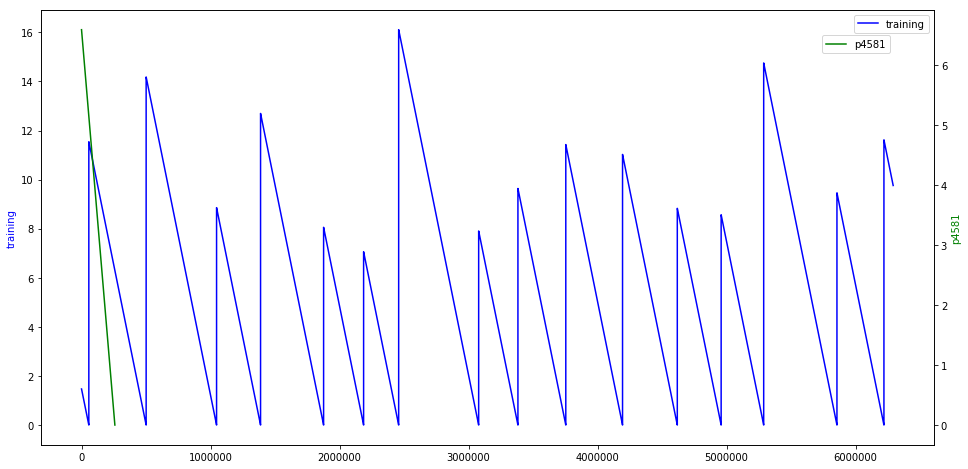

In [16]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.plot(train['time_to_failure'].values[::100], color='b')
ax1.set_ylabel('training', color='b')
plt.legend(['training'])
ax2 = ax1.twinx()
plt.plot(t.flatten()[::100], color='g')
ax2.set_ylabel('p4581', color='g')
plt.legend(['p4581'], loc=(0.875, 0.9))
plt.grid(False)